<a href="https://colab.research.google.com/github/Jody565/Project2/blob/main/Jody_Jacobs_Project2Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fname ="/content/drive/MyDrive/adult.csv"
df_income=pd.read_csv(fname)


##Load and inspect the data

In [ ]:
df_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df_income.shape
print(f'There are {df_income.shape[0]} rows, and {df_income.shape[1]} columns.')

There are 48842 rows, and 15 columns.


##Clean the Data

###Check for Duplicates

In [ ]:
df_income.duplicated().sum()

52

There are 52 duplicates in the data set

In [ ]:
df_income.drop_duplicates(inplace=True)

In [ ]:
df_income.duplicated().sum()

0

The duplicates have been dropped

###Checking Missing Values

In [ ]:
df_income.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

There is no Missing Values in the dataset

##Check for Data Inconsistancies

In [ ]:
str_cols=df_income.select_dtypes('object').columns
str_cols
# loop through the list of string columns
for col in str_cols:
# print the value counts for the column
 print(df_income[col].value_counts())
# Print an empty line for readability
 print('\n')

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64


Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64


Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical      

The only consistancies found are the question marks in certain features we will address this by making them blank and treating them as missing data

In [ ]:
df_income.replace('?',np.nan,inplace = True)

In [ ]:
df_income.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [ ]:
df_income.dropna(inplace=True)

In [ ]:
df_income.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

All Missing values have been removed

In [ ]:
df_income.describe(include='number').round(2)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.00,45175.00,45175.00,45175.00,45175.00,45175.00
mean,38.56,189738.80,10.12,1102.58,88.69,40.94
std,13.22,105652.44,2.55,7510.25,405.16,12.01
min,17.00,13492.00,1.00,0.00,0.00,1.00
25%,28.00,117392.50,9.00,0.00,0.00,40.00
50%,37.00,178312.00,10.00,0.00,0.00,40.00
75%,47.00,237903.00,13.00,0.00,0.00,45.00
max,90.00,1490400.00,16.00,99999.00,4356.00,99.00


In [ ]:
df_income['capital-gain'].value_counts()

0        41385
15024      498
7688       391
7298       351
99999      229
         ...  
22040        1
1731         1
7262         1
1639         1
2387         1
Name: capital-gain, Length: 121, dtype: int64

In [ ]:
df_income['capital-loss'].value_counts()

0       43035
1902      294
1977      246
1887      228
2415       68
        ...  
419         1
155         1
1539        1
2201        1
1421        1
Name: capital-loss, Length: 97, dtype: int64

The Capital gain and Capital loss columns seems to have mostly zero values,therefore i will drop these columns

In [ ]:
df_income.drop(['capital-gain','capital-loss'],axis=1,inplace=True)

In [ ]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   fnlwgt           45175 non-null  int64 
 3   education        45175 non-null  object
 4   educational-num  45175 non-null  int64 
 5   marital-status   45175 non-null  object
 6   occupation       45175 non-null  object
 7   relationship     45175 non-null  object
 8   race             45175 non-null  object
 9   gender           45175 non-null  object
 10  hours-per-week   45175 non-null  int64 
 11  native-country   45175 non-null  object
 12  income           45175 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


Columns have been removed

## Explore the data

In [ ]:

def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  temp_df = df_income.copy()
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100

  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  fig, ax = plt.subplots(figsize=figsize)

  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f"Column: {x}", fontweight='bold')
  fig.tight_layout()
  plt.show()

  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  val_counts = temp_df[x].value_counts(dropna=False)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = freq / len(temp_df) * 100
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax



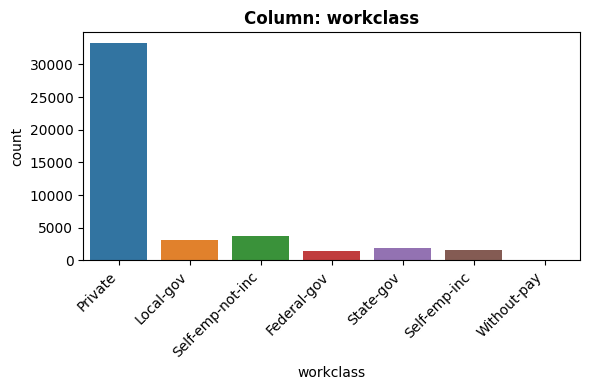

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'Private' occurs 33262 times (73.63%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df_income, 'workclass');

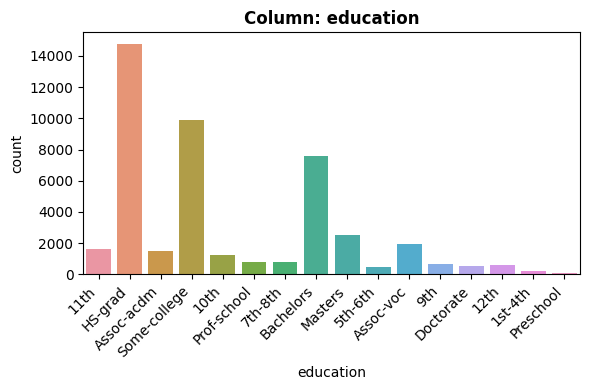

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'HS-grad' occurs 14770 times (32.7%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df_income, 'education');

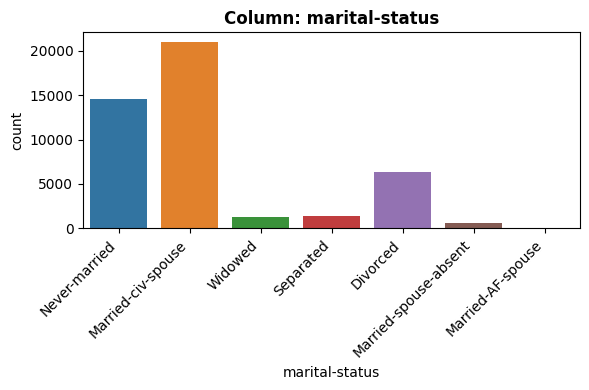

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'Married-civ-spouse' occurs 21042 times (46.58%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df_income, 'marital-status');

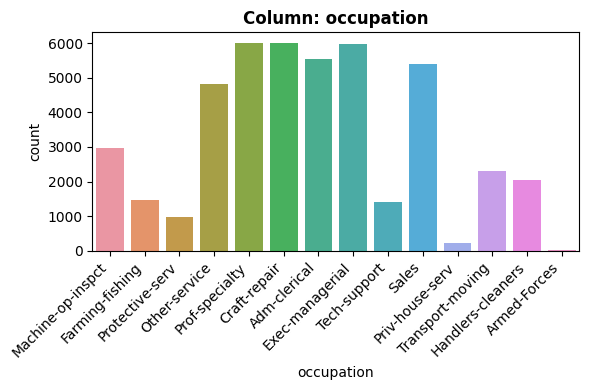

- NaN's Found: 0 (0.0%)
- Unique Values: 14
- Most common value: 'Craft-repair' occurs 6010 times (13.3%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df_income, 'occupation');

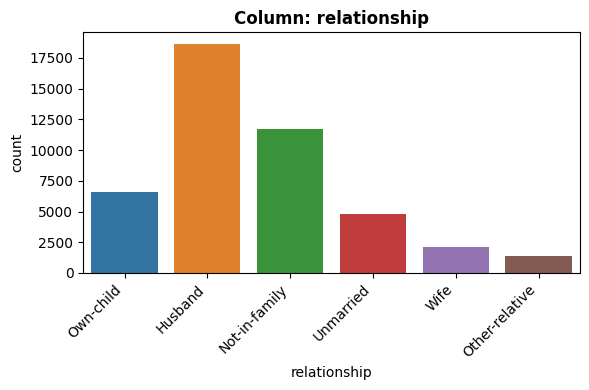

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: 'Husband' occurs 18653 times (41.29%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df_income, 'relationship');

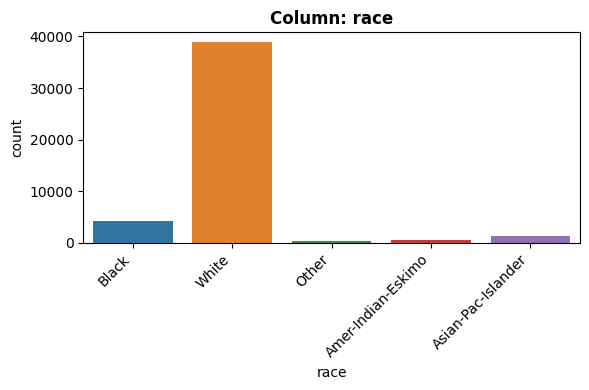

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'White' occurs 38859 times (86.02%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df_income, 'race');

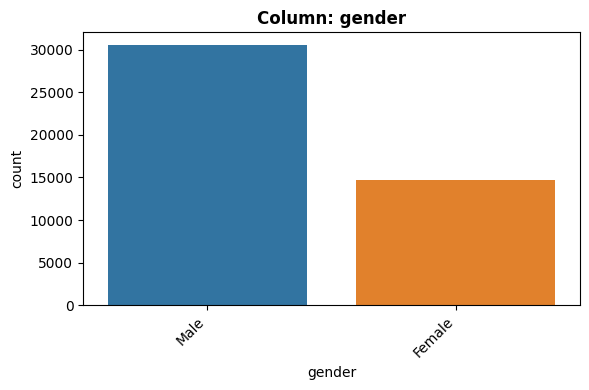

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Male' occurs 30495 times (67.5%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df_income, 'gender');

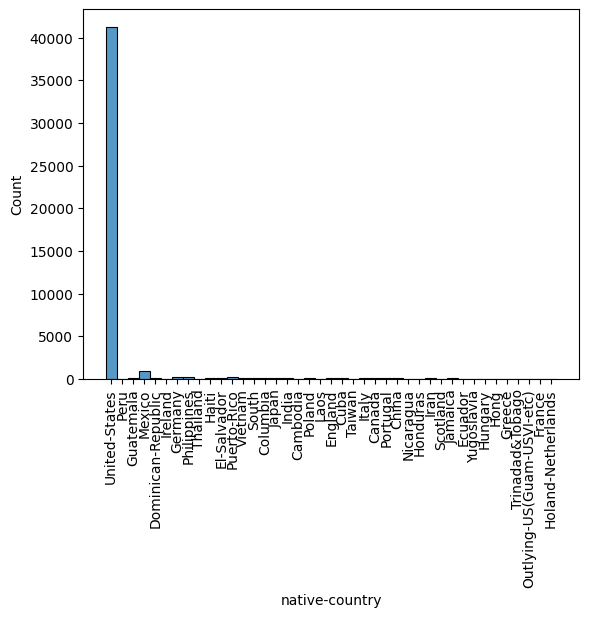

In [ ]:
ax = sns.histplot(data=df_income, x='native-country',binwidth =1000,)
ax.tick_params(axis='x', rotation = 90);

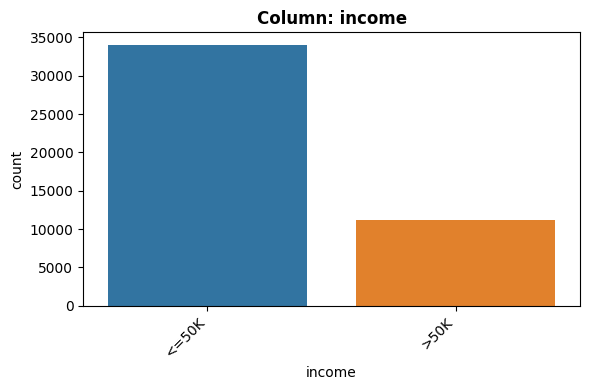

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '<=50K' occurs 33973 times (75.2%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df_income, 'income');

###Correlation bewteen Data


In [ ]:
corr = df_income.corr(numeric_only = True)
corr.round(2)


,age,fnlwgt,educational-num,hours-per-week
age,1.00,-0.08,0.04,0.10
fnlwgt,-0.08,1.00,-0.04,-0.02
educational-num,0.04,-0.04,1.00,0.15
hours-per-week,0.10,-0.02,0.15,1.00


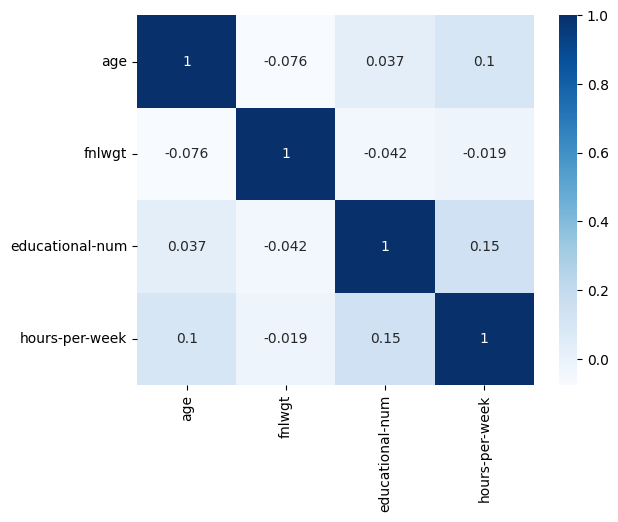

In [ ]:
sns.heatmap(corr, cmap = 'Blues', annot = True);

###Create Multivariate Visualizations

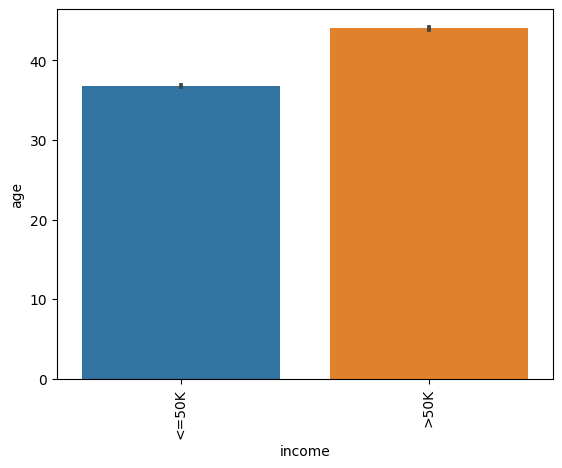

In [ ]:
ax = sns.barplot(data=df_income, x='income', y="age")
ax.tick_params(axis='x', rotation = 90);

From the Barplot above we can see that the most people earning over 50K are over 40yrs old

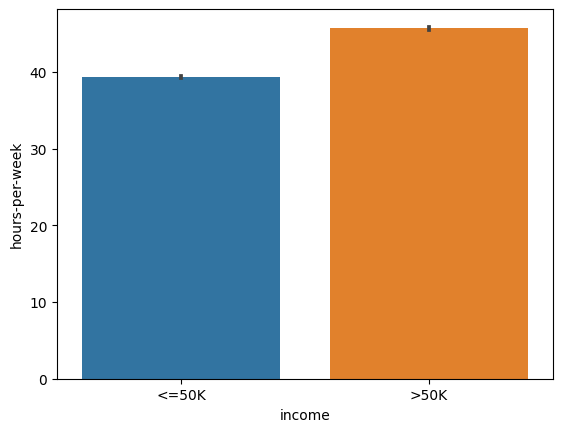

In [ ]:
ax = sns.barplot(data=df_income, x='income', y='hours-per-week')

We can see that most adults earning >50k work more than 40hours per week


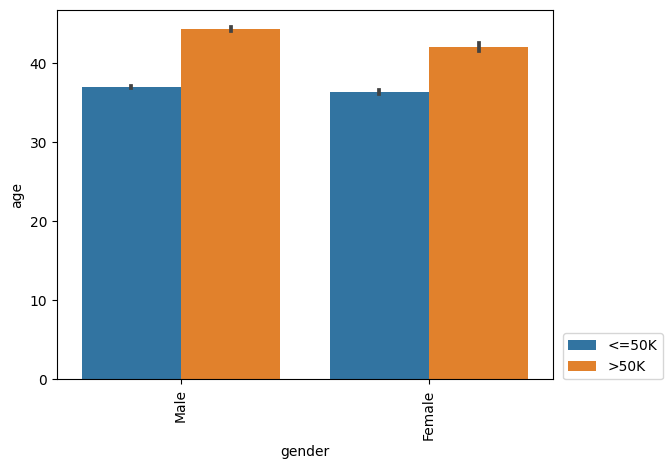

In [ ]:
ax = sns.barplot(data=df_income, x="gender", y="age", hue='income')
ax.tick_params(axis='x', rotation = 90)
ax.legend(loc=(1.02,0));

From the above graph we can see that most males and females earn >50k in their late 30's

###Key Trends

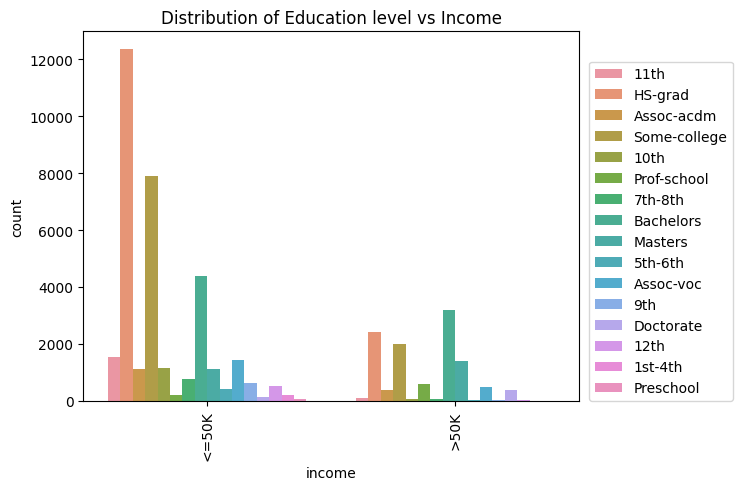

In [ ]:
ax = sns.countplot(data=df_income, x='income', hue='education')
ax.tick_params(axis='x', rotation = 90);
ax.set_title('Distribution of Education level vs Income')
ax.legend(loc=(1.02,0));

From the graph we can see that most adults earning less than 50k are highschool graduates or have some college education. Fore the adults earning greater than 50k the most adults have a bacholors degree.

Text(0.5, 1.0, 'Distribution of Income vs Gender')

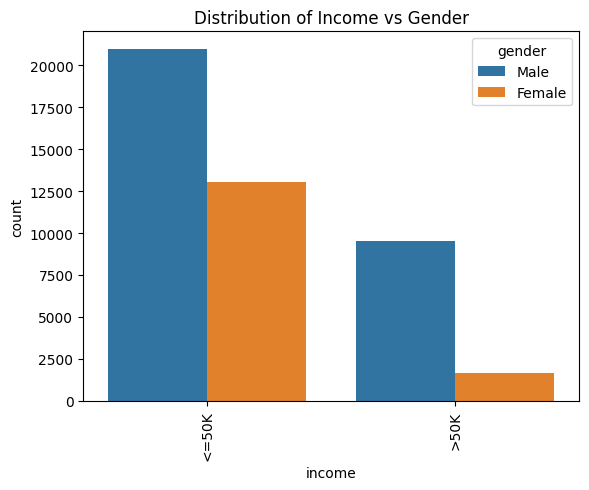

In [ ]:
ax = sns.countplot(data=df_income, x='income', hue='gender')
ax.tick_params(axis='x', rotation = 90);
ax.set_title('Distribution of Income vs Gender')


From the graph above we can see that there are very little females earning greater than 50k with Males accounting for most of the adults earning above 50K

##Prep for the Modelling


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler


In [ ]:
df_ml = df_income.copy()

In [ ]:
df_ml['income'] = df_income['income'].replace({'<=50K':0, '>50K':1})

In [ ]:
df_ml['income'].value_counts(normalize=False)

0    33973
1    11202
Name: income, dtype: int64

The model isnt balanced

In [ ]:
target = 'income'
X = df_ml.drop(columns = ['income'])
y = df_ml[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

###Check Model Balance

In [ ]:
y_train.value_counts(normalize=True)

0    0.752044
1    0.247956
Name: income, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.751992
1    0.248008
Name: income, dtype: float64

###Preparing the data for Modelling

In [ ]:
num_cols = X_train.select_dtypes('number').columns
num_cols

Index(['age', 'fnlwgt', 'educational-num', 'hours-per-week'], dtype='object')

In [ ]:
scaler = StandardScaler()
num_pipe = make_pipeline(scaler)
num_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [ ]:
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('standardscaler', StandardScaler())]),
 Index(['age', 'fnlwgt', 'educational-num', 'hours-per-week'], dtype='object'))

In [ ]:
ohe_cols = X_train.select_dtypes('object').columns
ohe_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [ ]:
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
ohe_pipe = make_pipeline(ohe_encoder)
ohe_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'gender', 'native-country'],
       dtype='object'))

In [ ]:
preprocessor = ColumnTransformer([num_tuple,ohe_tuple],
                                     verbose_feature_names_out=False, remainder ='drop')

###Model the Data

In [ ]:
# Custom function from code along to evaluate the classification metrics
## Create a function to display the classification metrics of a model
def classification_metrics(model, X_test, y_test, label='Test Data',
                             figsize=(15,5), normalize='true',
                             cmap='Greens', thresh=.5):

    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_proba = model.predict_proba(X_test)
    y_pred = [1 if x[1] > thresh else 0 for x in y_proba]

    ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                normalize=normalize, cmap=cmap,
                ax=axes[0])

    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()

In [ ]:
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, knn)

In [ ]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'educational-num', 'hours-per-week'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)

In [ ]:
labels = ['<50K','>50K']
print('Train Report')
print(classification_report(y_train, knn_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, knn_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

        <50K       0.90      0.93      0.91     25480
        >50K       0.76      0.70      0.73      8401

    accuracy                           0.87     33881
   macro avg       0.83      0.81      0.82     33881
weighted avg       0.87      0.87      0.87     33881

Test Report
              precision    recall  f1-score   support

        <50K       0.86      0.89      0.88      8493
        >50K       0.63      0.58      0.60      2801

    accuracy                           0.81     11294
   macro avg       0.75      0.73      0.74     11294
weighted avg       0.81      0.81      0.81     11294



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     25480
           1       0.76      0.70      0.73      8401

    accuracy                           0.87     33881
   macro avg       0.83      0.81      0.82     33881
weighted avg       0.87      0.87      0.87     33881



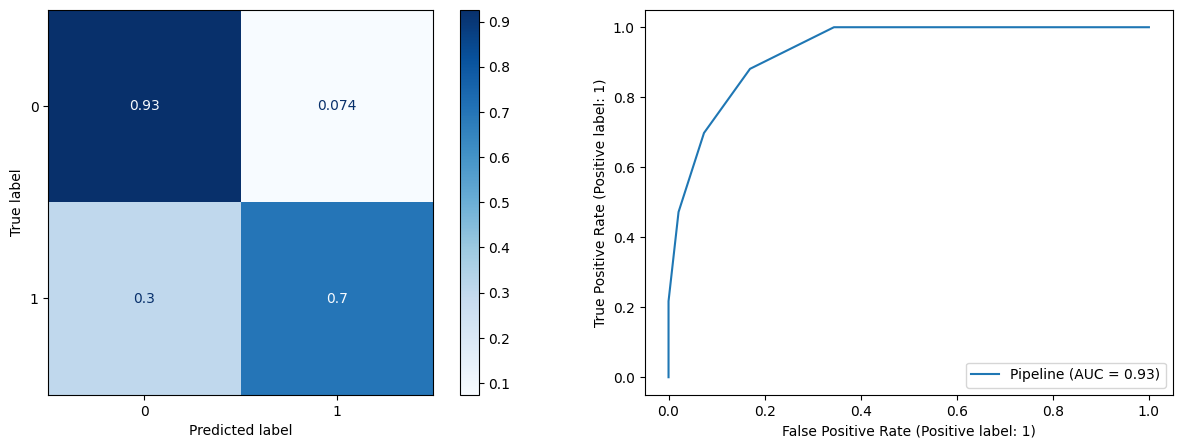

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      8493
           1       0.63      0.58      0.60      2801

    accuracy                           0.81     11294
   macro avg       0.75      0.73      0.74     11294
weighted avg       0.81      0.81      0.81     11294



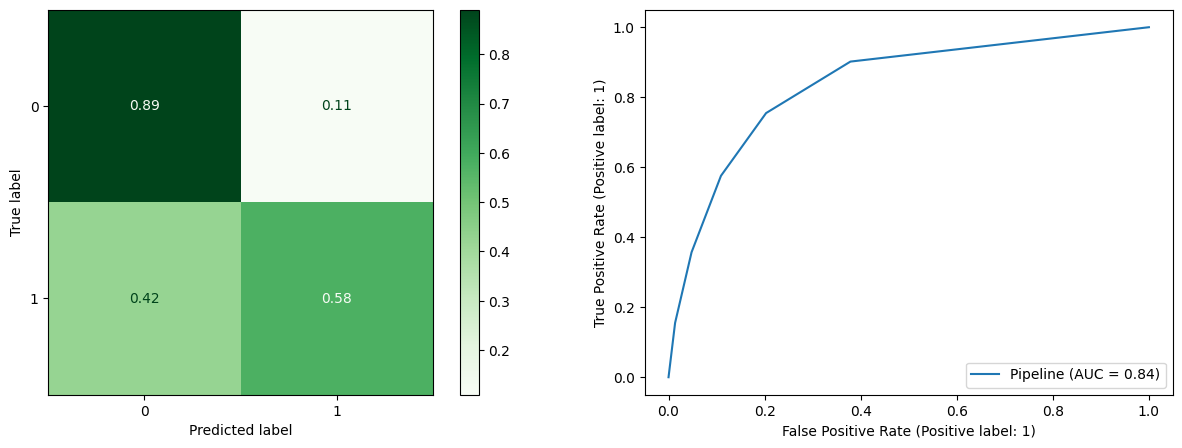

In [ ]:
labels = ['<50K','>50K']
classification_metrics(knn_pipe, X_train,y_train, thresh=.5,
                         cmap='Blues', label='Training Data')
classification_metrics(knn_pipe, X_test,y_test, thresh=.5,
                         cmap='Greens',label='Test Data')

The model does a good job with modelling the data, as he test data AUC is over 80% at 84% and it has an accuracy score of 81% for the test data. The model was good at predicting false positives with an accuracy of 11% however for the model performed worst when predicting false negatives with an error rate of 42%.

### Tune the Model

In [ ]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    Index(['age', 'fnlwgt', 'educational-num', 'hours-per-week'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(['workclass', 'education', 'marital-status', 'occupation',
          'relationship', 'race', 'gender', 'native-country'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransform

In [ ]:
params = {'kneighborsclassifier__n_neighbors': range(1,15),
          'kneighborsclassifier__weights': ['distance','uniform'],
          'kneighborsclassifier__leaf_size': [10,20,30,40,50]}

In [ ]:
knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'fnlwgt', 'educational-num', 'hours-per-week'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['...', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [10, 20, 30, 40,
                                                             50],
                         'kneighborsclassifier__n_neighbors': range(1, 15),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [ ]:
knn_gs.best_params_

{'kneighborsclassifier__leaf_size': 10,
 'kneighborsclassifier__n_neighbors': 14,
 'kneighborsclassifier__weights': 'uniform'}

In [ ]:
knn_gs.best_score_

0.8266873648438299

In [ ]:
best_knn = knn_gs.best_estimator_

In [ ]:
best_knn_train_preds = best_knn.predict(X_train)
best_knn_test_preds = best_knn.predict(X_test)

In [ ]:
print('Train\n', classification_report(y_train, best_knn_train_preds))
print('Test\n', classification_report(y_test, best_knn_test_preds))

Train
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     25480
           1       0.73      0.61      0.67      8401

    accuracy                           0.85     33881
   macro avg       0.80      0.77      0.78     33881
weighted avg       0.84      0.85      0.84     33881

Test
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      8493
           1       0.69      0.55      0.61      2801

    accuracy                           0.83     11294
   macro avg       0.77      0.73      0.75     11294
weighted avg       0.82      0.83      0.82     11294



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     25480
           1       0.73      0.61      0.67      8401

    accuracy                           0.85     33881
   macro avg       0.80      0.77      0.78     33881
weighted avg       0.84      0.85      0.84     33881



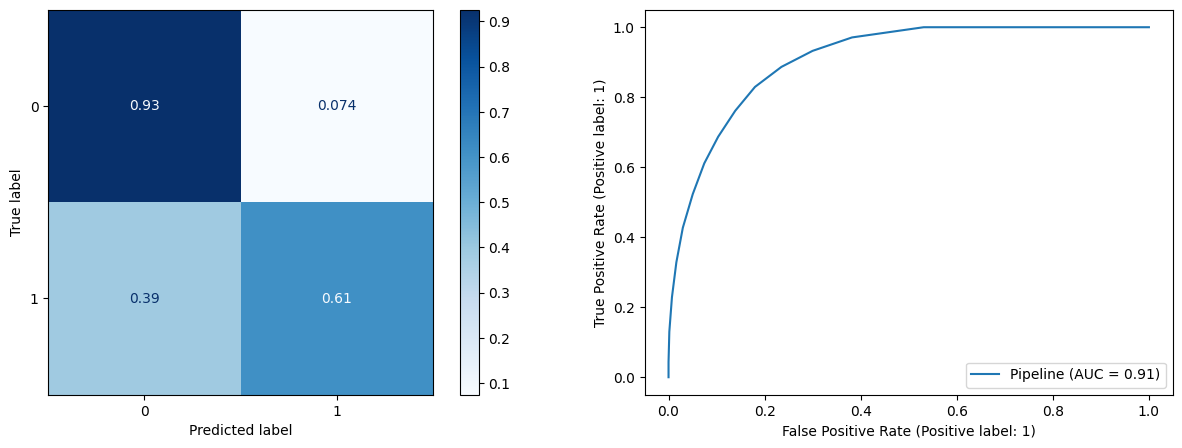

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      8493
           1       0.69      0.55      0.61      2801

    accuracy                           0.83     11294
   macro avg       0.77      0.73      0.75     11294
weighted avg       0.82      0.83      0.82     11294



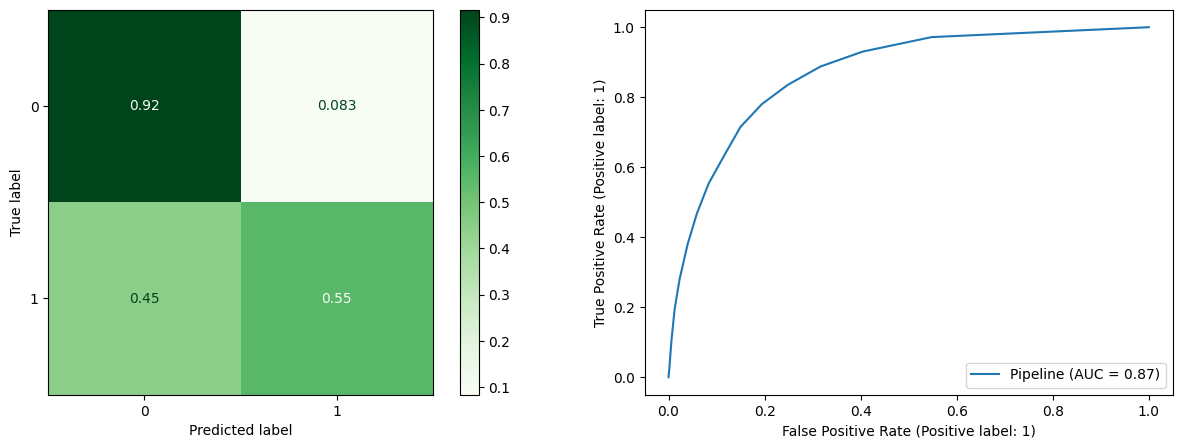

In [ ]:
classification_metrics(best_knn, X_train,y_train, thresh=.5,
                         cmap='Blues', label='Training Data')
classification_metrics(best_knn, X_test,y_test, thresh=.5,
                         cmap='Greens',label='Test Data')

After tuning the model we see some improvement in the test scores, as the test data AUC has increased from 84% at 87% and it has an accuracy score has also increased from 81% to 83% for the test data. The model was good at predicting false positives with an accuracy of 8.3% however for the model performed worst when predicting false negatives with an error rate of 45%.

### Logistic Regression Model

In [ ]:
lr = LogisticRegression(max_iter=1000,random_state =42)
lr_pipe = make_pipeline(preprocessor, lr)
lr_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['occupation', 'gender', 'hours-per-week', 'working_classes',
       'marriage_status', 'education_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
lr_train_preds = lr_pipe.predict(X_train)
lr_test_preds = lr_pipe.predict(X_test)

In [ ]:
labels = ['<50K','>50K']
print('Train Report')
print(classification_report(y_train, lr_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, lr_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

        <50K       0.86      0.91      0.89     25480
        >50K       0.68      0.55      0.60      8401

    accuracy                           0.82     33881
   macro avg       0.77      0.73      0.74     33881
weighted avg       0.81      0.82      0.82     33881

Test Report
              precision    recall  f1-score   support

        <50K       0.86      0.92      0.89      8493
        >50K       0.68      0.54      0.60      2801

    accuracy                           0.82     11294
   macro avg       0.77      0.73      0.74     11294
weighted avg       0.81      0.82      0.82     11294



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     25480
           1       0.68      0.55      0.60      8401

    accuracy                           0.82     33881
   macro avg       0.77      0.73      0.74     33881
weighted avg       0.81      0.82      0.82     33881



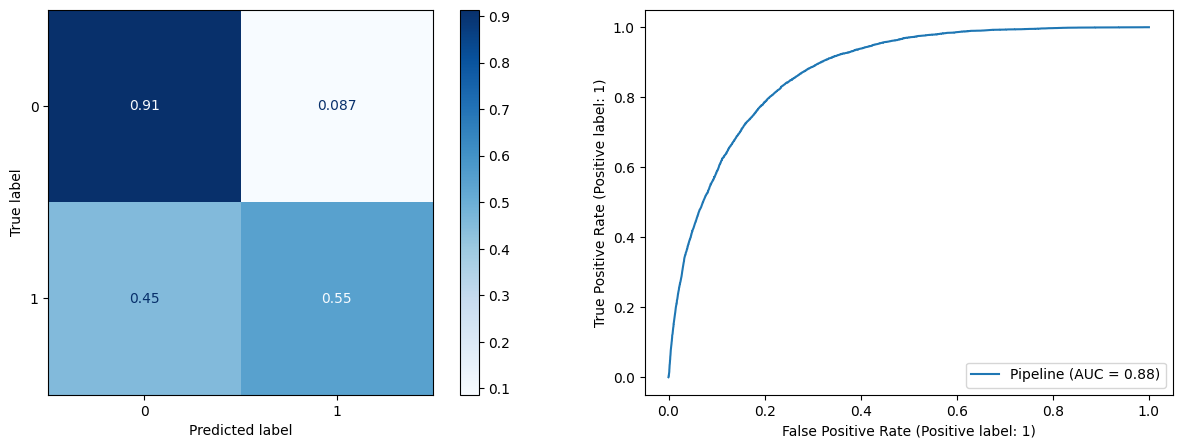

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      8493
           1       0.68      0.54      0.60      2801

    accuracy                           0.82     11294
   macro avg       0.77      0.73      0.74     11294
weighted avg       0.81      0.82      0.82     11294



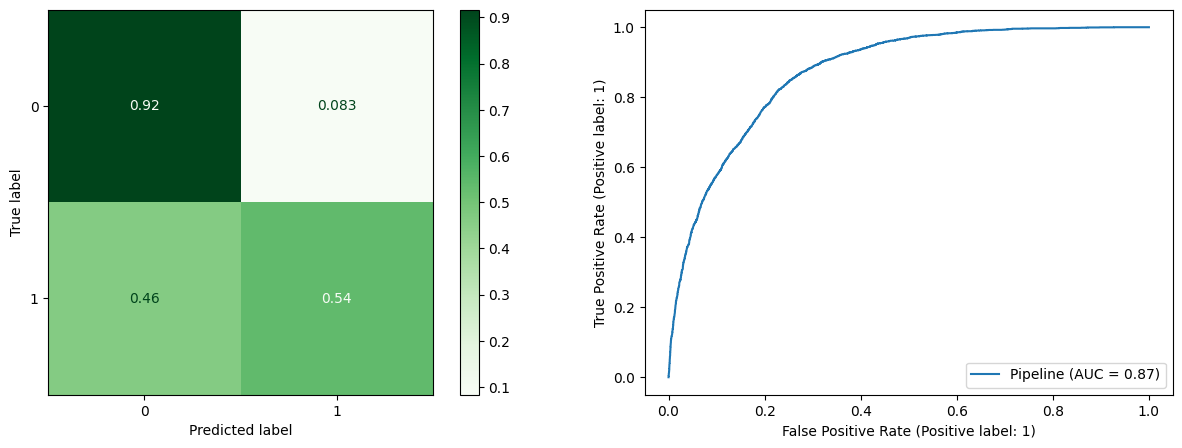

In [ ]:
classification_metrics(lr_pipe, X_train,y_train, thresh=.5,
                         cmap='Blues', label='Training Data')
classification_metrics(lr_pipe, X_test,y_test, thresh=.5,
                         cmap='Greens',label='Test Data')

The logistic regression model performed a bit better than the KNN tuned model. The test data AUC remains the same as 87% and the accuracy score has increased slightly from 81% to 82% for the test data. The model was good at predicting false positives with an accuracy of 8.33% however for the model performed worst when predicting false negatives with an error rate of 46%.

### Tuning the Model

In [ ]:
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    Index(['age', 'fnlwgt', 'educational-num', 'hours-per-week'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(['workclass', 'education', 'marital-status', 'occupation',
          'relationship', 'race', 'gender', 'native-country'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('logisticregression', LogisticRegression(max_iter=1000, random_state=42))],
 'verbose'

In [ ]:
params = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
lr_gs = GridSearchCV(lr_pipe, params)
lr_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'fnlwgt', 'educational-num', 'hours-per-week'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000]})

In [ ]:
lr_gs.best_params_

{'logisticregression__C': 1}

In [ ]:
best_lr = lr_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.73      0.82     25480
           1       0.52      0.88      0.65      8401

    accuracy                           0.77     33881
   macro avg       0.73      0.81      0.74     33881
weighted avg       0.84      0.77      0.78     33881



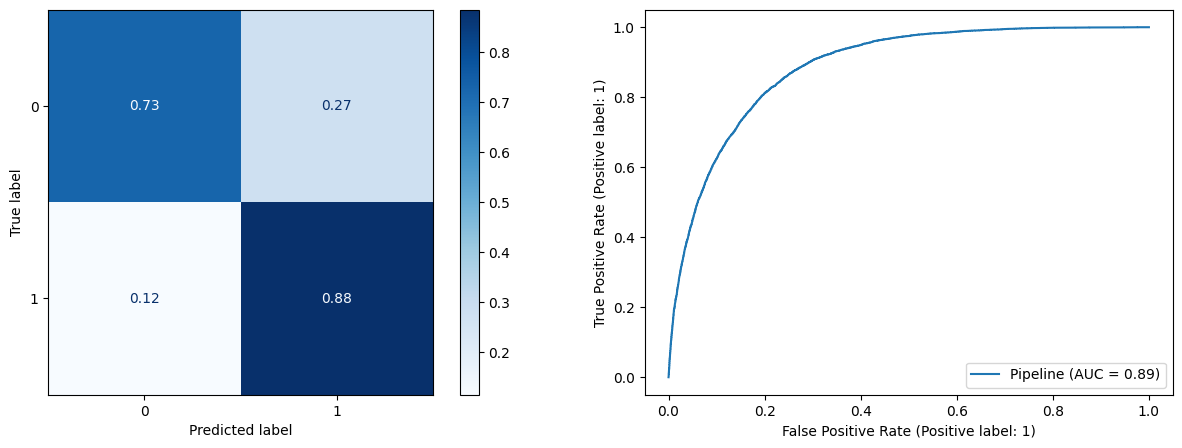

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.73      0.82      8493
           1       0.51      0.88      0.65      2801

    accuracy                           0.76     11294
   macro avg       0.73      0.80      0.74     11294
weighted avg       0.84      0.76      0.78     11294



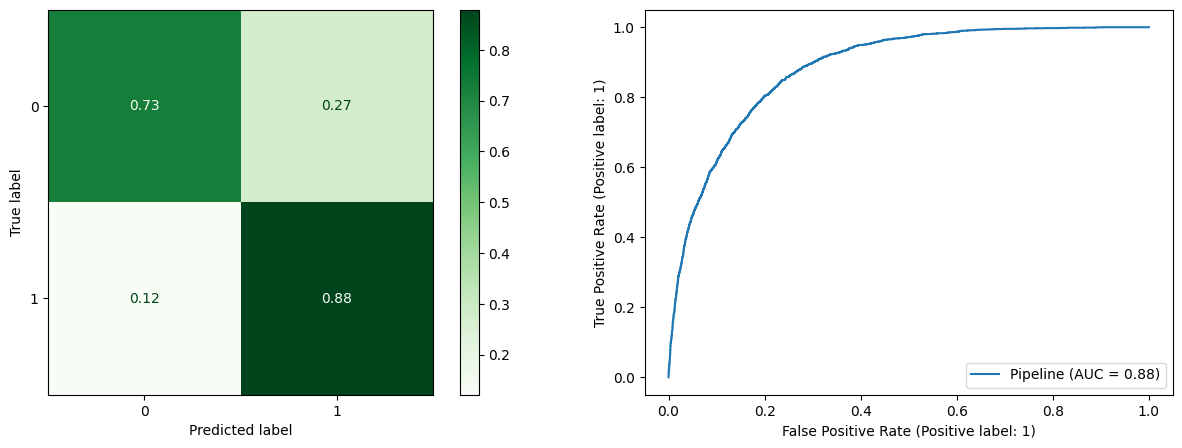

In [ ]:
classification_metrics(best_lr, X_train,y_train, thresh=.2,
                         cmap='Blues', label='Training Data')
classification_metrics(best_lr, X_test,y_test, thresh=.2,
                         cmap='Greens',label='Test Data')

After tuning the Logistic Regression model we see some slight improvements in some of the scores the AUC score has increased slightly from 87% to 88%. However the accuracy scores has decreased from 82% to 76%. The model was worst than the other models when predicting false positives with an accuracy of 27% however for the model performed better when predicting false negatives with an error rate of 12%.

### Feature Engineering

In [ ]:
df_fe = df_income.copy()

In [ ]:
df_fe.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   fnlwgt           45175 non-null  int64 
 3   education        45175 non-null  object
 4   educational-num  45175 non-null  int64 
 5   marital-status   45175 non-null  object
 6   occupation       45175 non-null  object
 7   relationship     45175 non-null  object
 8   race             45175 non-null  object
 9   gender           45175 non-null  object
 10  hours-per-week   45175 non-null  int64 
 11  native-country   45175 non-null  object
 12  income           45175 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


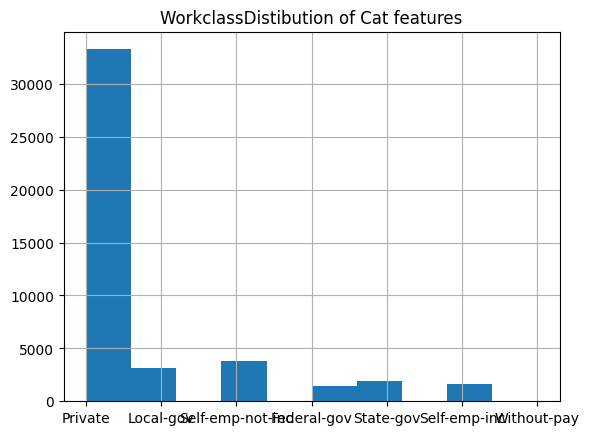

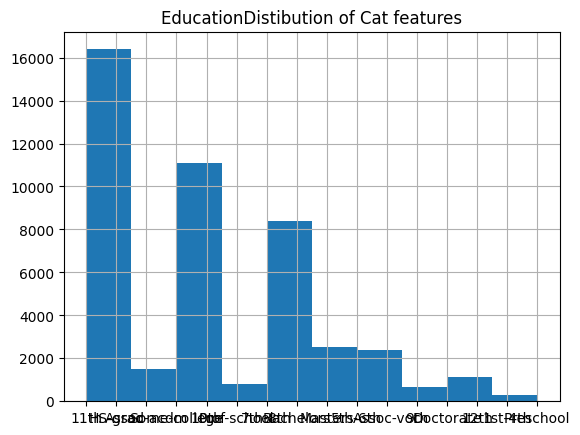

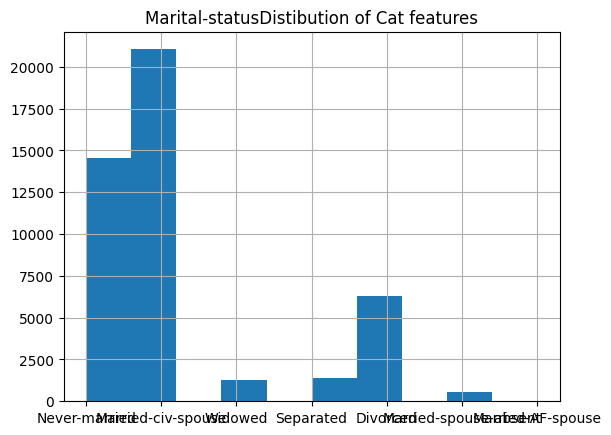

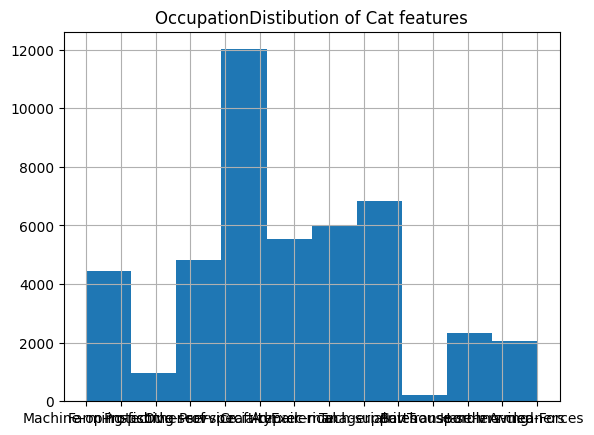

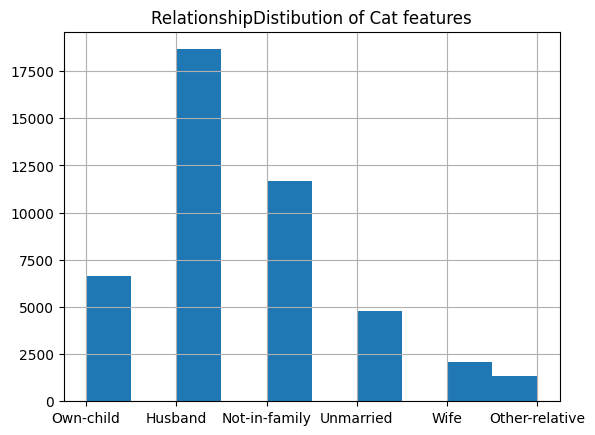

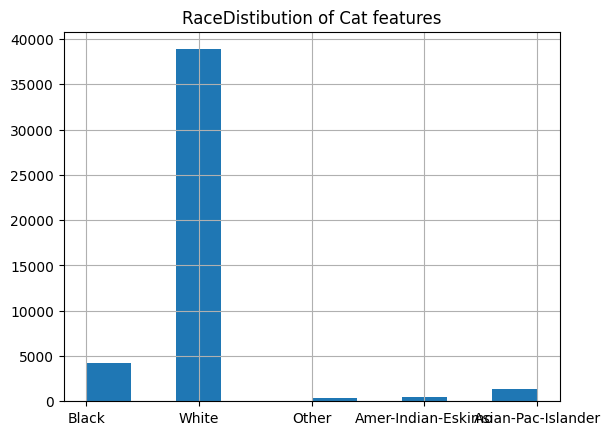

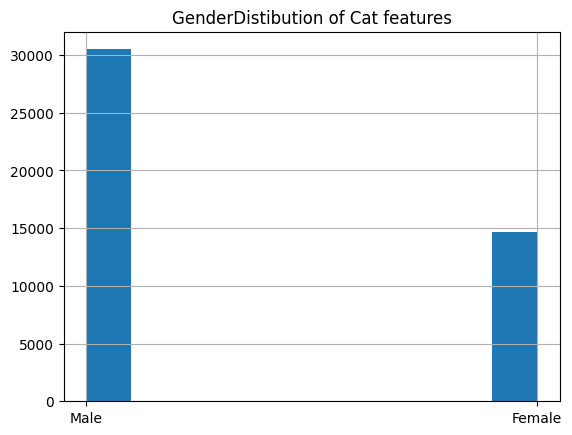

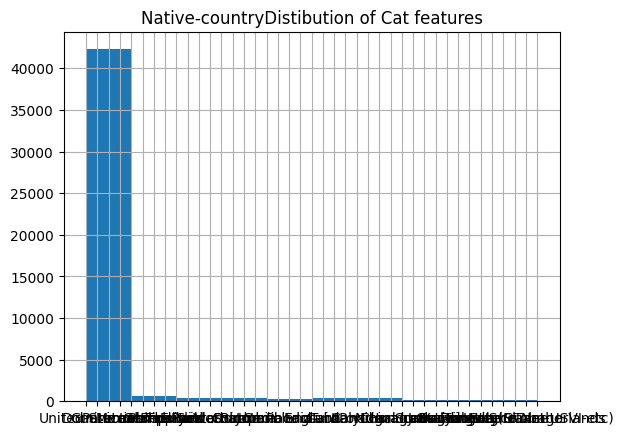

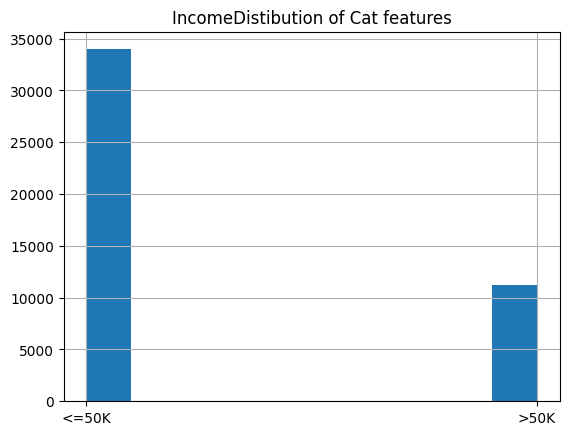

In [ ]:
for col in df_fe.select_dtypes('object'):
  df_fe[col].hist()
  plt.title(col.capitalize() + 'Distibution of Cat features')

  plt.show()

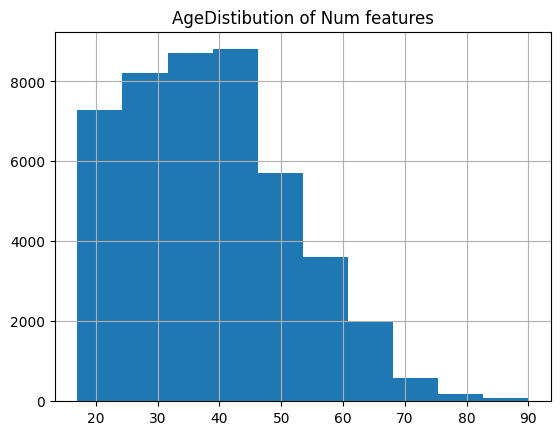

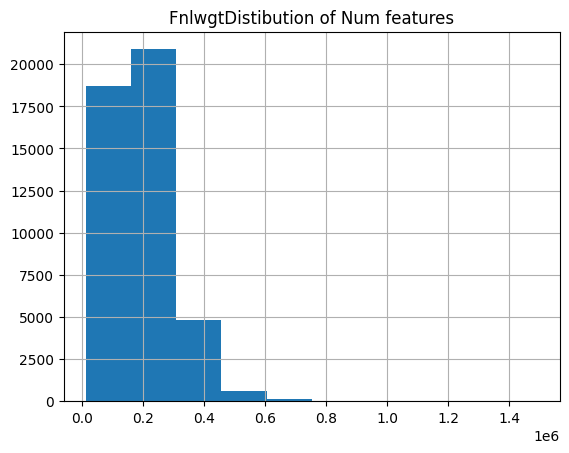

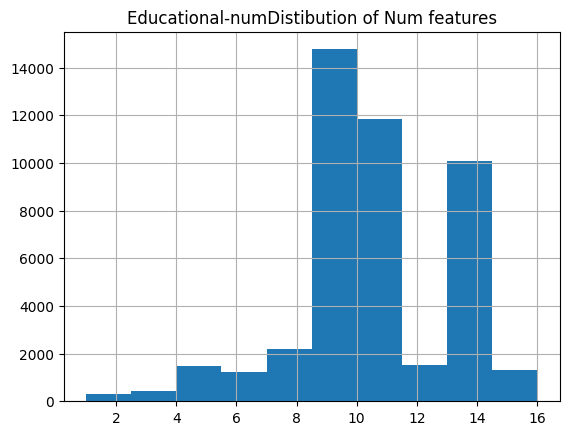

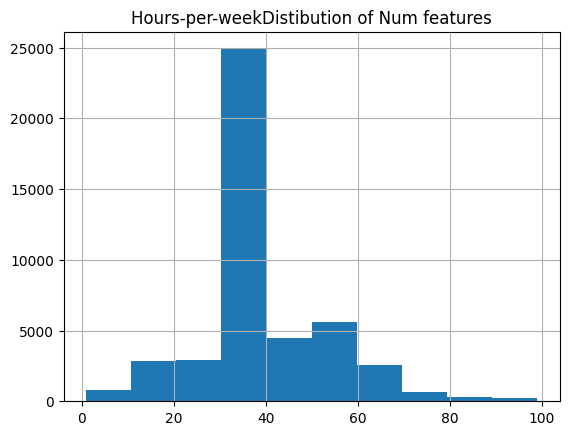

In [ ]:
for col in df_fe.select_dtypes('number'):
  df_fe[col].hist()
  plt.title(col.capitalize() + 'Distibution of Num features')

  plt.show()

###Dropping Features

Dropping the following features

In [ ]:
df_fe.drop(columns=['native-country','race','relationship', 'educational-num','fnlwgt'],inplace=True)

The above features were dropped as after analysis i found that the data was biased for most of these fields and they didnt add any value to the model

In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45175 non-null  int64 
 1   workclass       45175 non-null  object
 2   education       45175 non-null  object
 3   marital-status  45175 non-null  object
 4   occupation      45175 non-null  object
 5   gender          45175 non-null  object
 6   hours-per-week  45175 non-null  int64 
 7   income          45175 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


### Further Feature Engineering

In [ ]:
df_fe['hours-per-week'].value_counts()

40    21332
50     4091
45     2600
60     2085
35     1773
      ...  
79        1
69        1
87        1
94        1
82        1
Name: hours-per-week, Length: 96, dtype: int64

In [ ]:
bins = [0,39,40,100]
labels = ['<40','40','>40']
df_fe['hours-per-week'] = pd.cut(df_fe['hours-per-week'], bins=bins, labels=labels)

In [ ]:
df_fe['hours-per-week'].value_counts()

40     21332
>40    13769
<40    10074
Name: hours-per-week, dtype: int64

In [ ]:
df_fe['hours-per-week'] = df_fe['hours-per-week'].astype('object')

In [ ]:
df_fe['workclass'].value_counts()

Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [ ]:
private = []
gov_list = []
self_emp = []

In [ ]:
for value in df_fe['workclass']:
    if value == 'Private':
        private.append(value)
    elif value.endswith('gov'):
        gov_list.append(value)
    else:
        self_emp.append(value)


In [ ]:
df_fe['working_classes'] = df_fe['workclass'].apply(lambda x: 'Private' if x in private else 'gov' if x in gov_list else 'self_emp')


In [ ]:
df_fe['working_classes'].value_counts()

Private     33262
gov          6452
self_emp     5461
Name: working_classes, dtype: int64

In [ ]:
df_fe.drop(columns=['workclass'],inplace=True)

Drop the original workclass column

In [ ]:
df_fe['marital-status'].value_counts()

Married-civ-spouse       21042
Never-married            14567
Divorced                  6294
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [ ]:
Married = []
Not_Married = []


In [ ]:
for value in df_fe['marital-status']:
    if value.startswith ('Married'):
        Married.append(value)
    else:
        Not_Married.append(value)

In [ ]:
df_fe['marriage_status'] = df_fe['marital-status'].apply(lambda x: 'Married' if x in Married else 'Non_Married')


In [ ]:
df_fe['marriage_status'].value_counts()

Non_Married    23549
Married        21626
Name: marriage_status, dtype: int64

In [ ]:
df_fe.drop(columns=['marital-status'],inplace=True)

Drop the original Marital Status Column

In [ ]:
df_fe['education'].value_counts()

HS-grad         14770
Some-college     9887
Bachelors        7559
Masters          2513
Assoc-voc        1958
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           822
Prof-school       785
9th               676
12th              575
Doctorate         544
5th-6th           447
1st-4th           220
Preschool          70
Name: education, dtype: int64

In [ ]:
education_list = []
for i in df_fe.education:
    if i == '1st-4th' or i == '5th-6th' or i == '7th-8th' or i == '9th' or i=='10th' or i == '11th'or i== '12th':
        education_list.append('school_dropout')
    elif i == 'Some-college' or i == 'HS-grad':
        education_list.append('hs_graduate')
    else:
        education_list.append('post_hs_graduate')

In [ ]:
df_fe['education_status'] = education_list

In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               45175 non-null  int64 
 1   occupation        45175 non-null  object
 2   gender            45175 non-null  object
 3   hours-per-week    45175 non-null  object
 4   income            45175 non-null  int64 
 5   working_classes   45175 non-null  object
 6   marriage_status   45175 non-null  object
 7   education_status  45175 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


In [ ]:
df_fe['education_status'].value_counts()

hs_graduate         24657
post_hs_graduate    14936
school_dropout       5582
Name: education_status, dtype: int64

In [ ]:
df_fe.drop(columns=['education'],inplace=True)

Dropping the original education field

### Prepare the engineered data for Modelling

In [ ]:
df_fe['income'] = df_fe['income'].replace({'<=50K':0, '>50K':1})

In [ ]:
df_fe['income'].value_counts(normalize=False)

0    33973
1    11202
Name: income, dtype: int64

In [ ]:
target = 'income'
X = df_fe.drop(columns = ['income'])
y = df_fe[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

###Check the model Balance

In [ ]:
y_train.value_counts(normalize=True)

0    0.752044
1    0.247956
Name: income, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.751992
1    0.248008
Name: income, dtype: float64

The Model is not balanced

###Prepare the Data for Modelling

In [ ]:
num_cols = X_train.select_dtypes('number').columns
num_cols

Index(['age'], dtype='object')

In [ ]:
scaler = StandardScaler()
num_pipe = make_pipeline(scaler)
num_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [ ]:
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('standardscaler', StandardScaler())]),
 Index(['age'], dtype='object'))

In [ ]:
ohe_cols = X_train.select_dtypes('object').columns
ohe_cols

Index(['occupation', 'gender', 'hours-per-week', 'working_classes',
       'marriage_status', 'education_status'],
      dtype='object')

In [ ]:
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
ohe_pipe = make_pipeline(ohe_encoder)
ohe_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['occupation', 'gender', 'hours-per-week', 'working_classes',
        'marriage_status', 'education_status'],
       dtype='object'))

In [ ]:
preprocessor = ColumnTransformer([num_tuple,ohe_tuple],
                                     verbose_feature_names_out=False, remainder ='drop')

### Remodel the data

In [ ]:
# Custom function from code along to evaluate the classification metrics
## Create a function to display the classification metrics of a model
def classification_metrics(model, X_test, y_test, label='Test Data',
                             figsize=(15,5), normalize='true',
                             cmap='Greens', thresh=.5):

    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_proba = model.predict_proba(X_test)
    y_pred = [1 if x[1] > thresh else 0 for x in y_proba]

    ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                normalize=normalize, cmap=cmap,
                ax=axes[0])

    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()

In [ ]:
knn_fe = KNeighborsClassifier()
knn_fe_pipe = make_pipeline(preprocessor,knn_fe)

In [ ]:
knn_fe_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['occupation', 'gender', 'hours-per-week', 'working_classes',
       'marriage_status', 'education_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
knn_fe_train_preds = knn_fe_pipe.predict(X_train)
knn_fe_test_preds = knn_fe_pipe.predict(X_test)

In [ ]:
labels = ['<50K','>50K']
print('Train Report')
print(classification_report(y_train, knn_fe_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, knn_fe_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

        <50K       0.89      0.92      0.90     25480
        >50K       0.72      0.66      0.69      8401

    accuracy                           0.85     33881
   macro avg       0.81      0.79      0.80     33881
weighted avg       0.85      0.85      0.85     33881

Test Report
              precision    recall  f1-score   support

        <50K       0.86      0.89      0.87      8493
        >50K       0.62      0.56      0.59      2801

    accuracy                           0.81     11294
   macro avg       0.74      0.72      0.73     11294
weighted avg       0.80      0.81      0.80     11294



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     25480
           1       0.72      0.66      0.69      8401

    accuracy                           0.85     33881
   macro avg       0.81      0.79      0.80     33881
weighted avg       0.85      0.85      0.85     33881



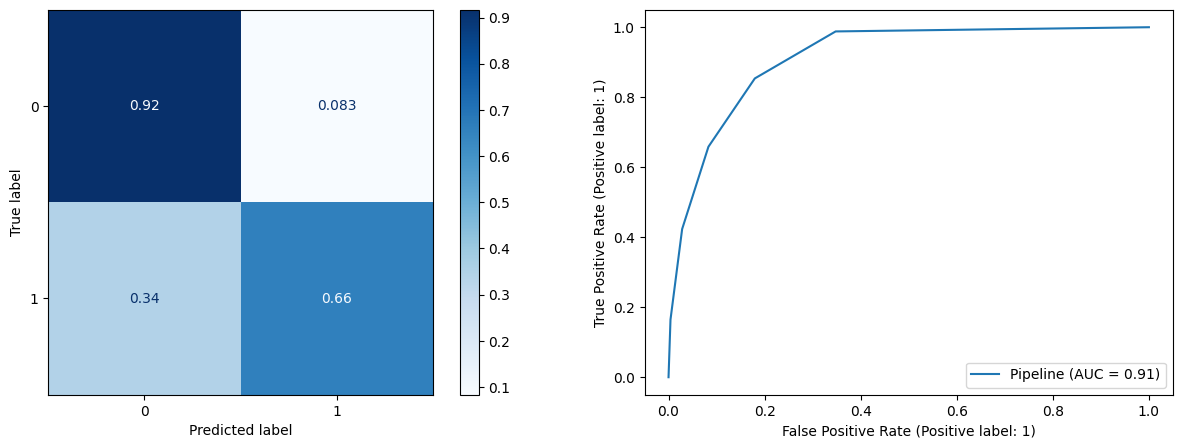

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      8493
           1       0.62      0.56      0.59      2801

    accuracy                           0.81     11294
   macro avg       0.74      0.72      0.73     11294
weighted avg       0.80      0.81      0.80     11294



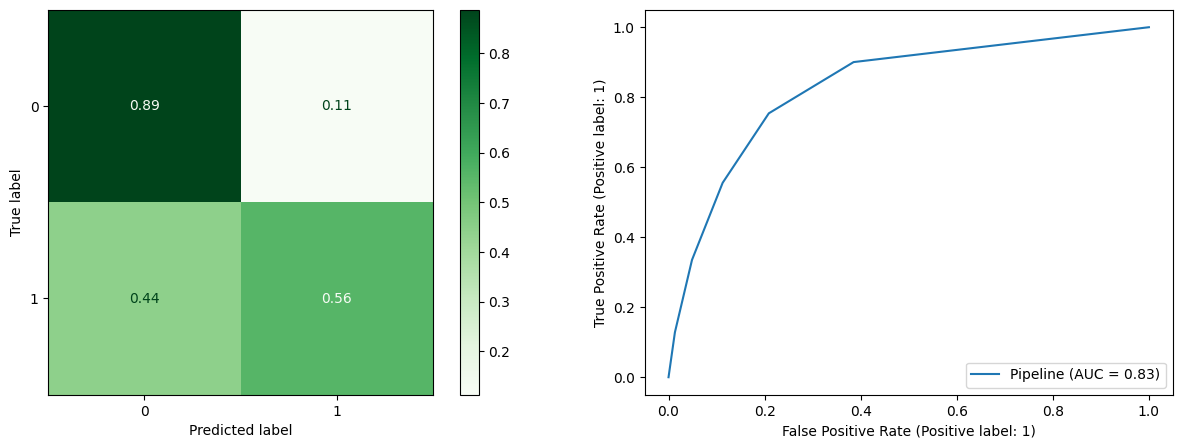

In [ ]:
classification_metrics(knn_fe_pipe, X_train,y_train, thresh=.5,
                         cmap='Blues', label='Training Data')
classification_metrics(knn_fe_pipe, X_test,y_test, thresh=.5,
                         cmap='Greens',label='Test Data')

After the feature engineering we see our KNN model is now giving us a AUC score of 83% and a acciracy score of 81% for the test data.The model was good at predicting false positives with an accuracy of 11% however for the model performed worst when predicting false negatives with an error rate of 44%.

Tune the KNN Model

In [ ]:
knn_fe_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    Index(['age'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(['occupation', 'gender', 'hours-per-week', 'working_classes',
          'marriage_status', 'education_status'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('numeric',
        

In [ ]:
params = {'kneighborsclassifier__n_neighbors': range(1,15),
          'kneighborsclassifier__weights': ['distance','uniform'],
          'kneighborsclassifier__leaf_size': [10,20,30,40,50]}

In [ ]:
knn_fe_gs = GridSearchCV(knn_fe_pipe, params)
knn_fe_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['occupation', 'gender', 'hours-per-week', 'working_classes',
       'marriage_status', 'education_status'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [10, 20, 30, 40,
                                                             50],
                         'kneighborsclassifier__n_neighbors': range(1, 15),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [ ]:
knn_fe_gs.best_params_

{'kneighborsclassifier__leaf_size': 10,
 'kneighborsclassifier__n_neighbors': 14,
 'kneighborsclassifier__weights': 'uniform'}

In [ ]:
knn_fe_gs.best_score_

0.821050077533236

In [ ]:
best_fe_knn = knn_fe_gs.best_estimator_

In [ ]:
best_knn_train_preds = best_fe_knn.predict(X_train)
best_knn_test_preds = best_fe_knn.predict(X_test)

In [ ]:
print('Train\n', classification_report(y_train, best_knn_train_preds))
print('Test\n', classification_report(y_test, best_knn_test_preds))

Train
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     25480
           1       0.72      0.58      0.64      8401

    accuracy                           0.84     33881
   macro avg       0.80      0.75      0.77     33881
weighted avg       0.83      0.84      0.83     33881

Test
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      8493
           1       0.68      0.53      0.60      2801

    accuracy                           0.82     11294
   macro avg       0.77      0.72      0.74     11294
weighted avg       0.81      0.82      0.81     11294



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     25480
           1       0.72      0.58      0.64      8401

    accuracy                           0.84     33881
   macro avg       0.80      0.75      0.77     33881
weighted avg       0.83      0.84      0.83     33881



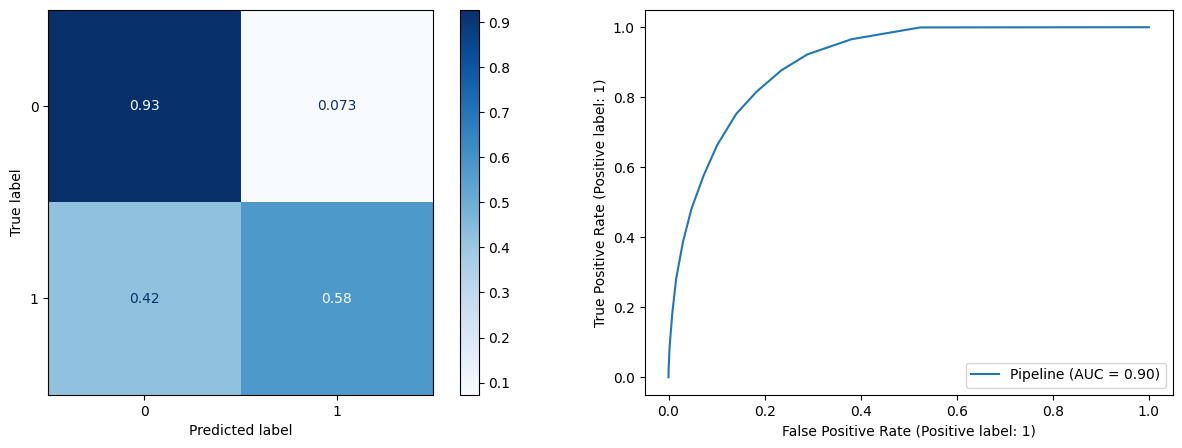

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      8493
           1       0.68      0.53      0.60      2801

    accuracy                           0.82     11294
   macro avg       0.77      0.72      0.74     11294
weighted avg       0.81      0.82      0.81     11294



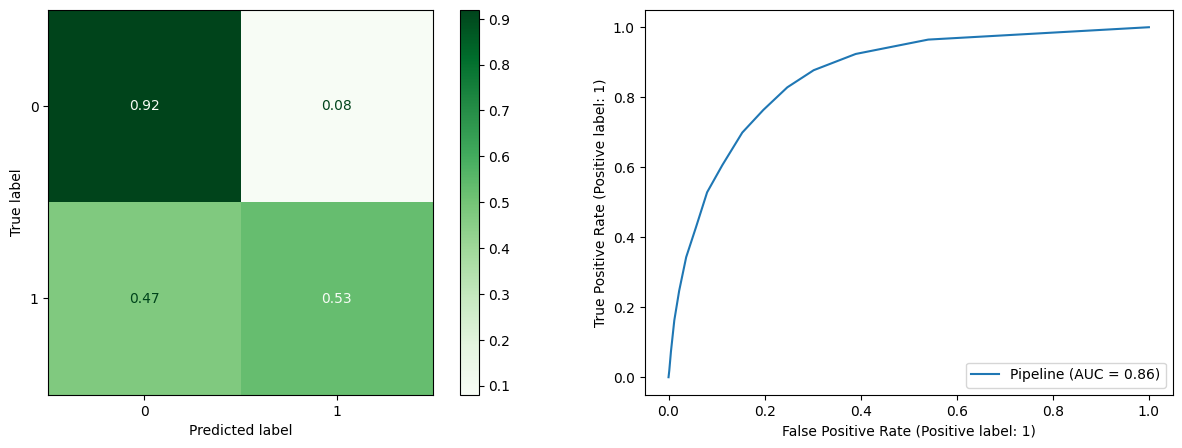

In [ ]:
classification_metrics(best_fe_knn, X_train,y_train, thresh=.5,
                         cmap='Blues', label='Training Data')
classification_metrics(best_fe_knn, X_test,y_test, thresh=.5,
                         cmap='Greens',label='Test Data')

After tuning the model we see some improvement in the test scores, as the test data AUC has increased from 83% at 86% and it has an accuracy score has also increased from 81% to 82% for the test data. The model was good at predicting false positives with an accuracy of 8% however for the model performed worst when predicting false negatives with an error rate of 47%

### Logistic Regression Model

In [ ]:
lr_fe = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_fe_pipe = make_pipeline(preprocessor, lr_fe)
lr_fe_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['occupation', 'gender', 'hours-per-week', 'working_classes',
       'marriage_status', 'education_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [ ]:
lr_fe_train_preds = lr_fe_pipe.predict(X_train)
lr_fe_test_preds = lr_fe_pipe.predict(X_test)

In [ ]:
labels = ['<50K','>50K']
print('Train Report')
print(classification_report(y_train, lr_fe_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, lr_fe_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

        <50K       0.93      0.77      0.84     25480
        >50K       0.54      0.82      0.65      8401

    accuracy                           0.78     33881
   macro avg       0.74      0.80      0.75     33881
weighted avg       0.83      0.78      0.80     33881

Test Report
              precision    recall  f1-score   support

        <50K       0.93      0.77      0.84      8493
        >50K       0.54      0.82      0.65      2801

    accuracy                           0.78     11294
   macro avg       0.73      0.79      0.75     11294
weighted avg       0.83      0.78      0.79     11294



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     25480
           1       0.54      0.82      0.65      8401

    accuracy                           0.78     33881
   macro avg       0.74      0.80      0.75     33881
weighted avg       0.83      0.78      0.80     33881



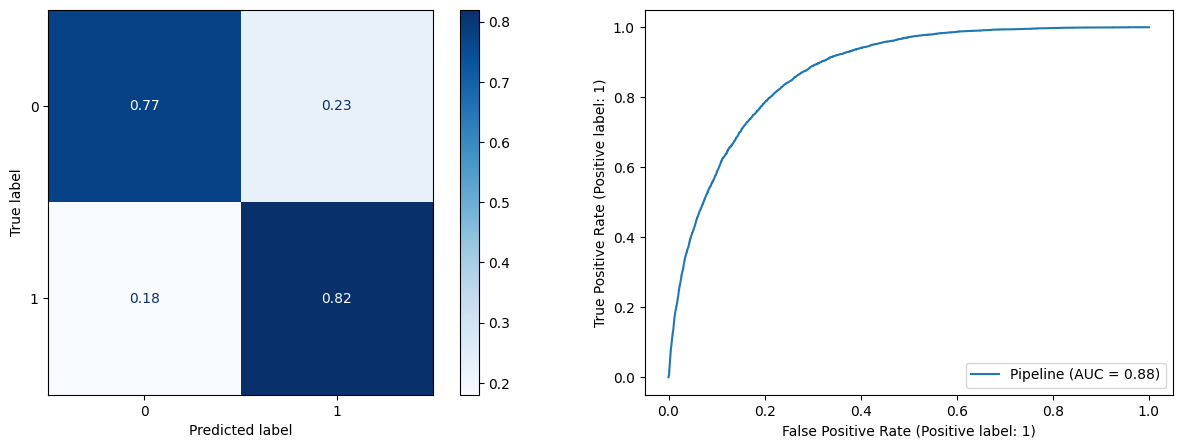

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      8493
           1       0.54      0.82      0.65      2801

    accuracy                           0.78     11294
   macro avg       0.73      0.79      0.75     11294
weighted avg       0.83      0.78      0.79     11294



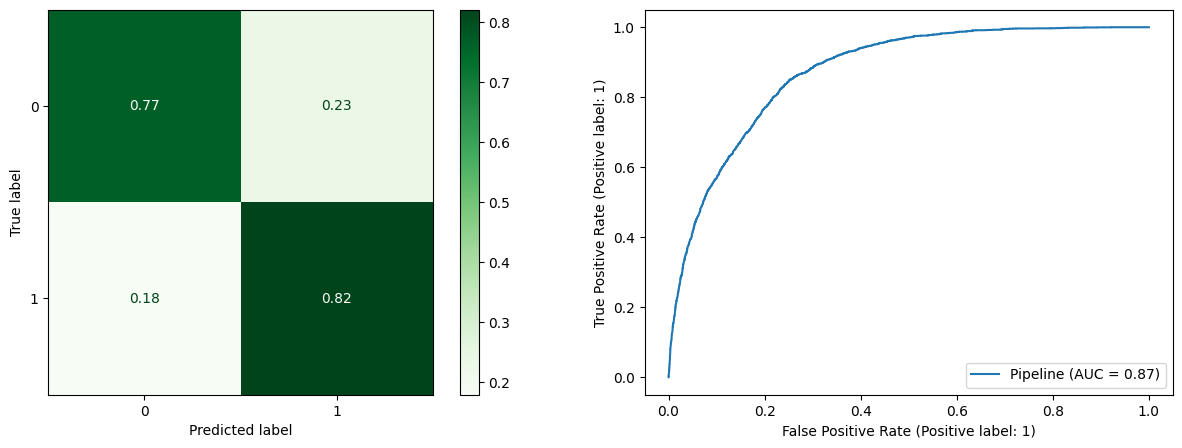

In [ ]:
classification_metrics(lr_fe_pipe, X_train,y_train, thresh=.5,
                         cmap='Blues', label='Training Data')
classification_metrics(lr_fe_pipe, X_test,y_test, thresh=.5,
                         cmap='Greens',label='Test Data')


The logistic regression model performed a bit worst than the KNN tuned model. The test data AUC has increased slightly from 86% to 87% and the accuracy score has dropped from 81% to 76% for the test data. The model was slightly worst at predicting false positives with an accuracy of 23% however for the model performed better and only had an error rate of 18% for false negatives.

### Tuning the Model

In [ ]:
lr_fe_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    Index(['age'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(['occupation', 'gender', 'hours-per-week', 'working_classes',
          'marriage_status', 'education_status'],
         dtype='object'))],
                     verbose_feature_names_out=False)),
  ('logisticregression',
   LogisticRegression(class_weight='balanced', max_iter=1000))],
 'verbose': False,
 'columntransformer': ColumnTransform

In [ ]:
params = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
lr_fe_gs = GridSearchCV(lr_fe_pipe, params)
lr_fe_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['occupation', 'gender', 'hours-per-week', 'working_classes',
       'marriage_status', 'education_status'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000]})

In [ ]:
lr_fe_gs.best_params_

{'logisticregression__C': 1}

In [ ]:
lr_fe_gs.best_score_

0.7839496968616853

In [ ]:
best_fe_lr = lr_fe_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     25480
           1       0.54      0.82      0.65      8401

    accuracy                           0.78     33881
   macro avg       0.74      0.80      0.75     33881
weighted avg       0.83      0.78      0.80     33881



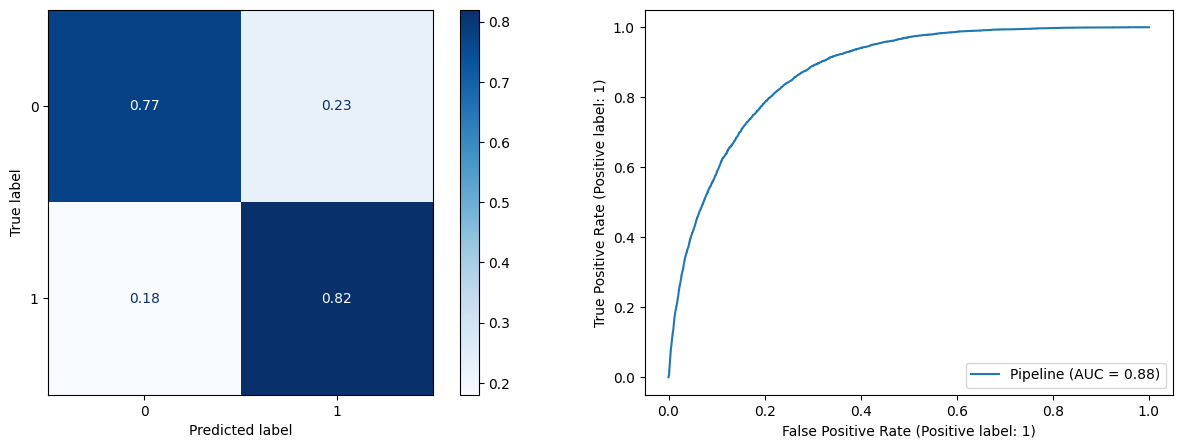

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      8493
           1       0.54      0.82      0.65      2801

    accuracy                           0.78     11294
   macro avg       0.73      0.79      0.75     11294
weighted avg       0.83      0.78      0.79     11294



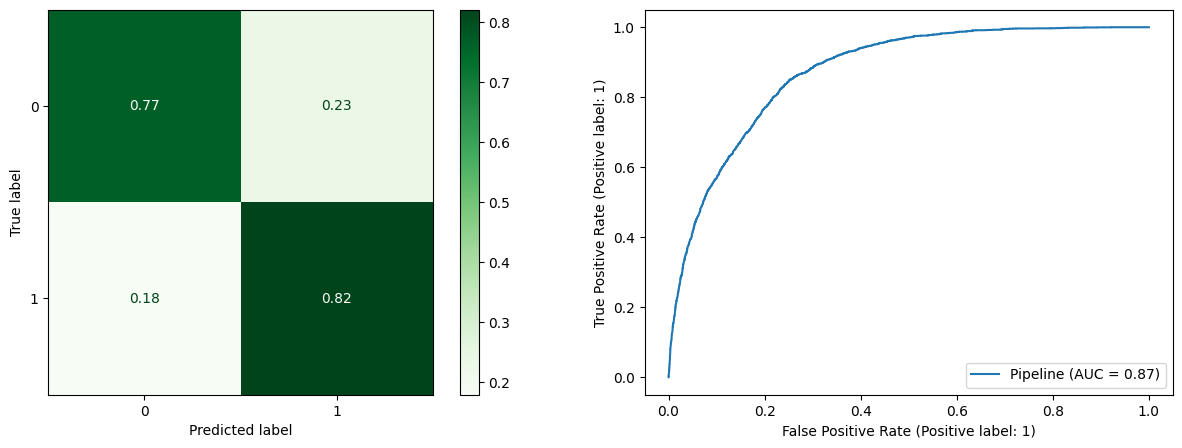

In [ ]:
classification_metrics(best_fe_lr, X_train,y_train, thresh=.5,
                         cmap='Blues', label='Training Data')
classification_metrics(best_fe_lr, X_test,y_test, thresh=.5,
                         cmap='Greens',label='Test Data')

After tuning the regression model perforned slightly better . The test data AUC has remained the same at 87% and the accuracy score has increaseed from 76% to 78% for the test data. The model was slightly worst at creating false positives with an accuracy of 23% however for the model performed better than the KNN tuned model and only had an error rate of 18% for false negatives.

###Recommendation

The Model i choose to productionize is the Tuned Logistic regression model without the Feature engineering as it has the highest AUC score 88%. However the accuracy score is lower than some of the models at 76%, it has the highest recall score of 88%. The model was worst than the other models when predicting false positives with an accuracy of 27% however for the model performed better when predicting false negatives with an error rate of 12% which seems to be alot more balanced than the other models.The model is howver not perfect  especially shown on the recall metric where we only get about approx 88% as we could not get any score of 90% also the model was under balanced so results could be skewed to look better than they actually are.